<a href="https://colab.research.google.com/github/olumideadekunle/Data-Sharing-among-Business/blob/main/Copy_of_Question_mini_project_module_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sales Data Analysis: Uncovering Trends and Insights from a Real-World Sales Dataset

In today’s competitive market, data-driven decision-making is crucial for businesses to optimize their sales strategies. Sales data contains valuable insights that can help organizations understand customer behavior, identify seasonal trends, and improve overall performance. By analyzing a real-world sales dataset, businesses can make informed decisions to boost revenue and enhance customer satisfaction.

## Objective

Your analysis in this mini project will focus on cleaning, exploring, and visualizing a sales dataset to extract meaningful insights using python and data visualization libraries.

## About the Dataset

The **[dataset](https://drive.google.com/file/d/1V6HTxMsNQswvL_K39UWB7dh8Un8f4oz7/view?usp=sharing)** used in this analysis is a real-world sales dataset containing transaction records from a retail business. It includes the following key features:

- `OrderID`: The id or the order that was placed.
- `Date`: The date the order was placed.
- `CustomerID`: The customer ID that represents the customer who made the purchase.
- `Product`: The class of product that was purchased.
- `Quantity`: The quantity of the product that was purchased.
- `Price`: Unit price of the product in dollars.
- `Total`: The total cost of the purchase in dollars.


In [1]:
# Install necessary libraries (if not already installed)
!pip install pandas matplotlib seaborn numpy

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
# Upload the file manually in Colab or read from local directory
from google.colab import files
uploaded = files.upload()

# Load dataset
df = pd.read_csv("C:/Users/SAIL/OneDrive/Desktop/3MTT/Dataset.csv")

# Preview the dataset
df.head()


Saving Dataset.csv to Dataset.csv


,OrderID,Date,CustomerID,Product,Quantity,Price,Total
0,1,2024-04-12,C002,Phone,1,600,642.09
1,2,2024-12-14,C003,Laptop,2,1000,2098.39
2,3,2024-09-27,C017,Monitor,1,200,196.34
3,4,2024-04-16,C005,Phone,3,600,1955.86
4,5,2024-03-12,C017,Laptop,1,1000,1098.19


In [3]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Fill missing 'Total' values based on 'Quantity' * 'Price'
df['Total'] = df['Total'].fillna(df['Quantity'] * df['Price'])

# Remove duplicate rows if any
df.drop_duplicates(inplace=True)

# Remove rows where Product is 'None'
df = df[df['Product'] != 'None']

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Check data types
print("\nData Types:\n", df.dtypes)

# Preview cleaned data
df.head()


Missing values:
 OrderID        0
Date           0
CustomerID     0
Product       10
Quantity       0
Price          0
Total          6
dtype: int64

Data Types:
 OrderID                int64
Date          datetime64[ns]
CustomerID            object
Product               object
Quantity               int64
Price                  int64
Total                float64
dtype: object


,OrderID,Date,CustomerID,Product,Quantity,Price,Total
0,1,2024-04-12,C002,Phone,1,600,642.09
1,2,2024-12-14,C003,Laptop,2,1000,2098.39
2,3,2024-09-27,C017,Monitor,1,200,196.34
3,4,2024-04-16,C005,Phone,3,600,1955.86
4,5,2024-03-12,C017,Laptop,1,1000,1098.19



Summary Statistics:
           OrderID                 Date   Quantity        Price        Total
count  200.000000                  200  200.00000   200.000000   200.000000
mean   100.500000  2024-07-06 23:09:36    1.36500   676.000000   933.009550
min      1.000000  2024-01-02 00:00:00    1.00000   100.000000    93.310000
25%     50.750000  2024-04-08 18:00:00    1.00000   400.000000   564.002500
50%    100.500000  2024-07-09 12:00:00    1.00000   600.000000   838.350000
75%    150.250000  2024-09-27 18:00:00    2.00000  1000.000000  1062.367500
max    200.000000  2024-12-29 00:00:00    3.00000  1000.000000  3293.240000
std     57.879185                  NaN    0.61943   300.291316   647.446344

Top-Selling Products:
 Product
Laptop        107
Phone          76
Tablet         42
Monitor        22
Headphones     12
Name: Quantity, dtype: int64

Top Customers:
 CustomerID
C003    14930.68
C001    13851.85
C016    12267.02
C017    12091.74
C005    11717.83
C006    11634.56
C004    11459

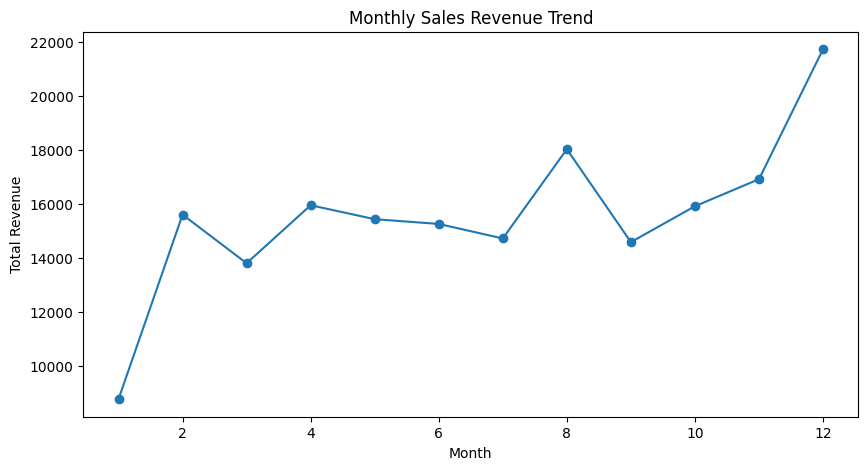

In [4]:
# Summary statistics
print("\nSummary Statistics:\n", df.describe())

# Top-selling products
top_products = df.groupby('Product')['Quantity'].sum().sort_values(ascending=False)
print("\nTop-Selling Products:\n", top_products)

# Top customers by total spending
top_customers = df.groupby('CustomerID')['Total'].sum().sort_values(ascending=False)
print("\nTop Customers:\n", top_customers)

# Revenue trends over time
df.groupby(df['Date'].dt.month)['Total'].sum().plot(kind='line', marker='o', figsize=(10,5))
plt.title('Monthly Sales Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()


<ipython-input-5-5d70fe3538d9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products.values, palette="viridis")


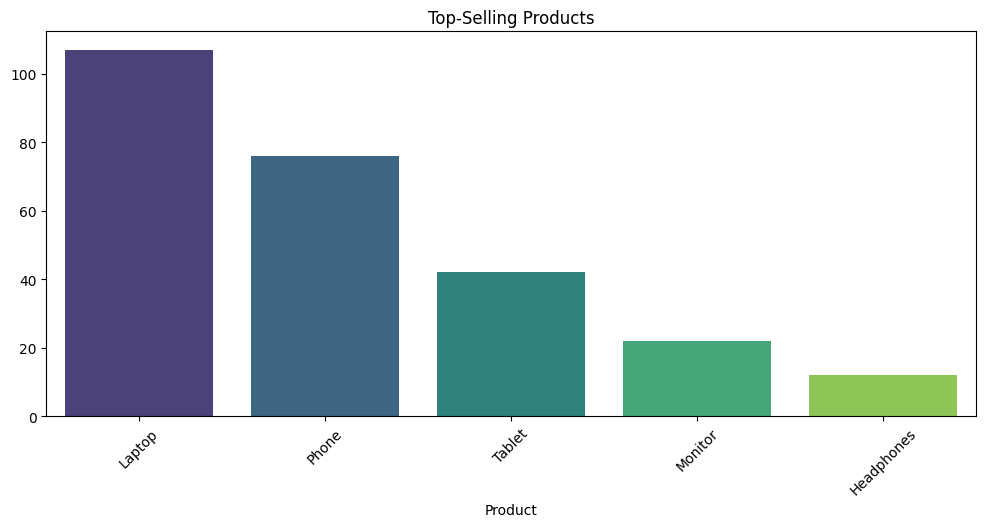

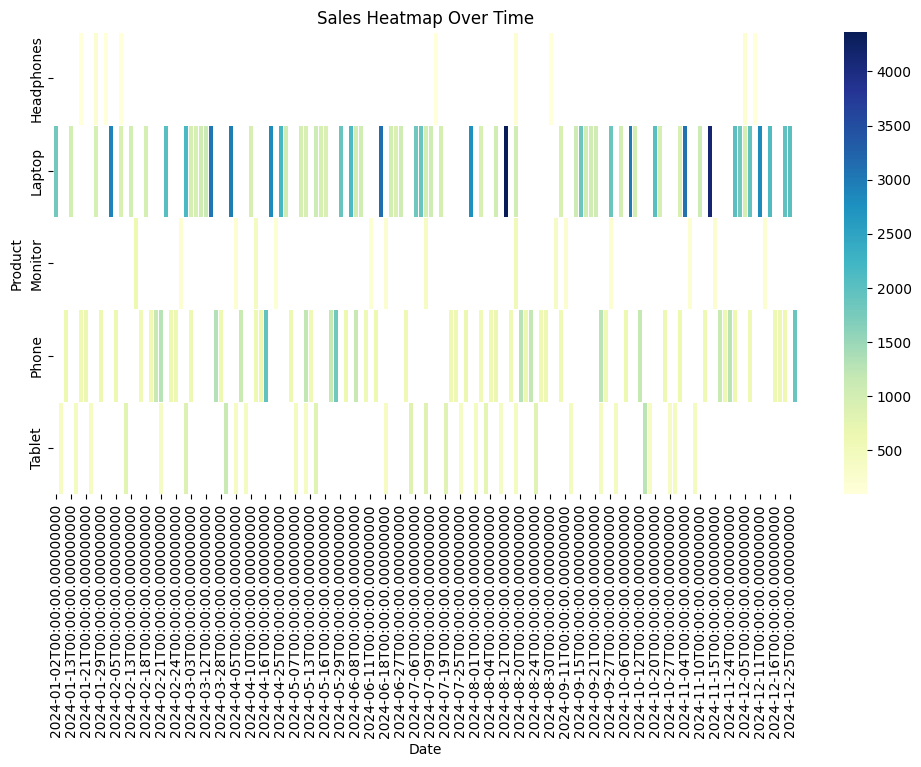

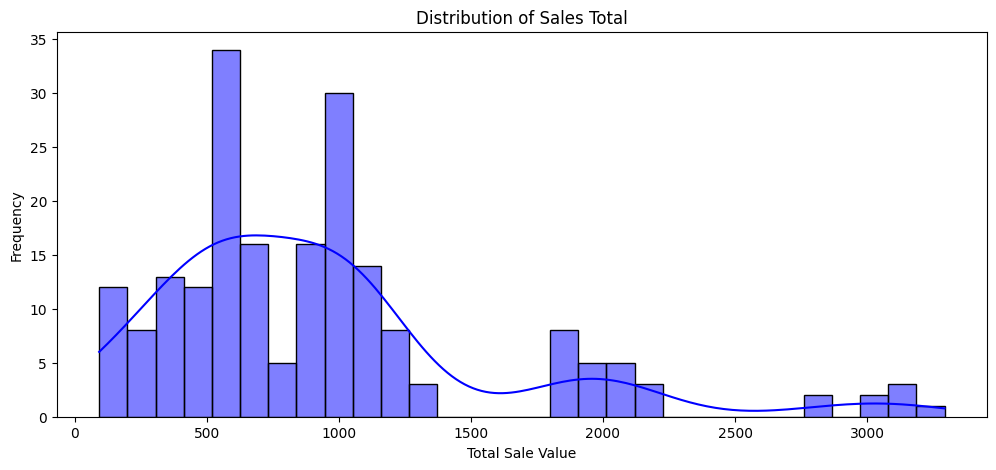

In [5]:
# Sales distribution per product
plt.figure(figsize=(12,5))
sns.barplot(x=top_products.index, y=top_products.values, palette="viridis")
plt.title('Top-Selling Products')
plt.xticks(rotation=45)
plt.show()

# Heatmap of sales per product category
pivot_table = df.pivot_table(values='Total', index='Product', columns='Date', aggfunc='sum')
plt.figure(figsize=(12,6))
sns.heatmap(pivot_table, cmap="YlGnBu", linewidths=0.5)
plt.title('Sales Heatmap Over Time')
plt.show()

# Customer spending distribution
plt.figure(figsize=(12,5))
sns.histplot(df['Total'], bins=30, kde=True, color='blue')
plt.title('Distribution of Sales Total')
plt.xlabel('Total Sale Value')
plt.ylabel('Frequency')
plt.show()


In [6]:
print("\nBusiness Insights:")
print("- Top-selling product categories can be prioritized in marketing strategies.")
print("- High-spending customers can be offered loyalty rewards.")
print("- Revenue trends help determine peak seasons for stock adjustments.")
print("- Discounts may be introduced for low-performing products to boost sales.")



Business Insights:
- Top-selling product categories can be prioritized in marketing strategies.
- High-spending customers can be offered loyalty rewards.
- Revenue trends help determine peak seasons for stock adjustments.
- Discounts may be introduced for low-performing products to boost sales.
